<IPython.core.display.Javascript object>


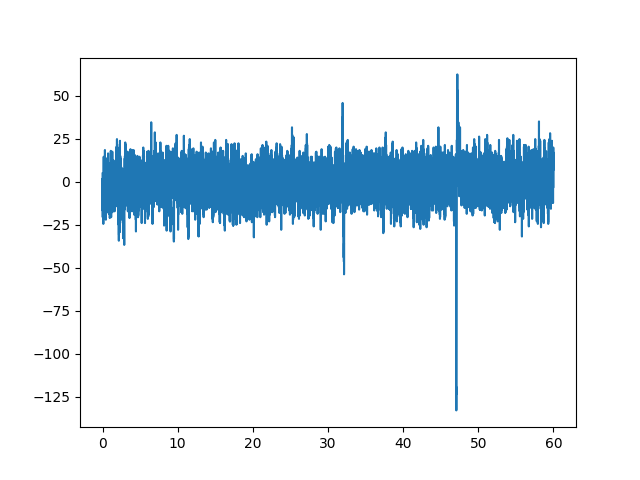

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
%matplotlib notebook
import matplotlib.pyplot as plt

data = pd.read_csv('../dataset/raw-data/tatomir-focused-2.csv', delimiter=',')
data = data.iloc[:,:5]

data['timestamps'] = data['timestamps'] - data['timestamps'].iloc[0]
data = data.loc[(data['timestamps'] >= 3) & (data['timestamps'] < 63)]
data['timestamps'] = data['timestamps'] - data['timestamps'].iloc[0]
data.rename(columns={'timestamps':'Time'},inplace=True)
data.reset_index(drop=True,inplace=True)

data_time = np.array(data['Time'])

data_TP9o = np.array(data['TP9'])
# Center signal on X axis
data_TP9 = data_TP9o - np.mean(data_TP9o)
#data_TP9 = data_TP9o
# Plots
#fig, (ax1,ax2) = plt.subplots(2,sharex=True)
#ax1.plot(data_time, data_TP9o)
#ax2.plot(data_time, data_TP9)
plt.plot(data_time, data_TP9)

In [2]:
# Plot FFT of initial signal
n = np.size(data_time)
# Generate freq axis
frq_axis = (Fs/2)*np.linspace(0,1,n/2)
# Compute FFT
X = np.fft.fft(data_TP9)
Xmax = (2/n)*abs(X[0:np.size(frq_axis)])
plt.plot(frq_axis, Xmax)
plt.xlim(0,15)
plt.ylim(0,10)

NameError: name 'Fs' is not defined

<IPython.core.display.Javascript object>


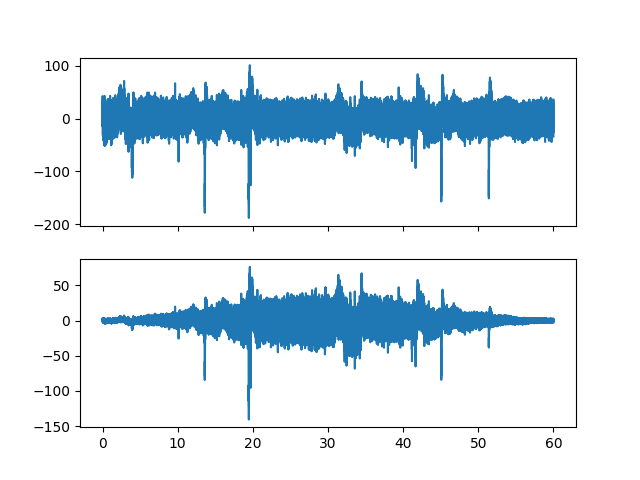

In [509]:
ham_window = np.hamming(data_TP9.size)
data_TP9w = data_TP9 * ham_window
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.plot(data_time, data_TP9)
ax2.plot(data_time, data_TP9w)

In [1]:
b, a = signal.butter(5,[49.8,50.2], btype='bandstop', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
#plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency Hz')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

NameError: name 'signal' is not defined

<IPython.core.display.Javascript object>


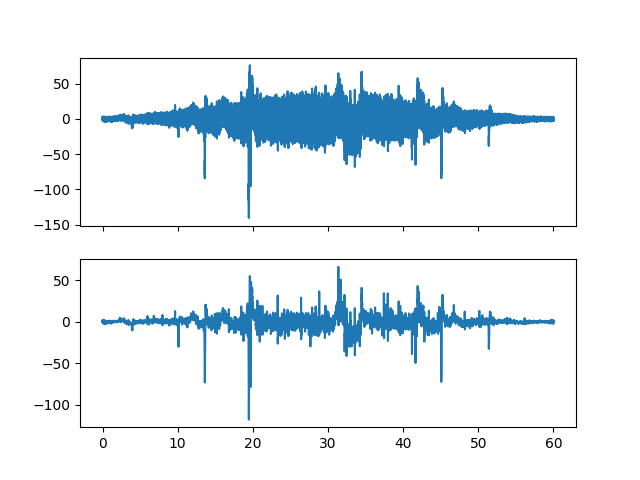

In [486]:
# Create bandstop filter around 50 Hz to eliminate AC noise
Fs = 256
Fn = Fs / 2
flow = 49.8 / Fn
fhigh = 50.2 / Fn

b, a = signal.butter(5,[flow,fhigh], btype='bandstop')
data_TP9filt = signal.filtfilt(b, a, data_TP9w)

fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.plot(data_time, data_TP9w)
ax2.plot(data_time, data_TP9filt)


<IPython.core.display.Javascript object>


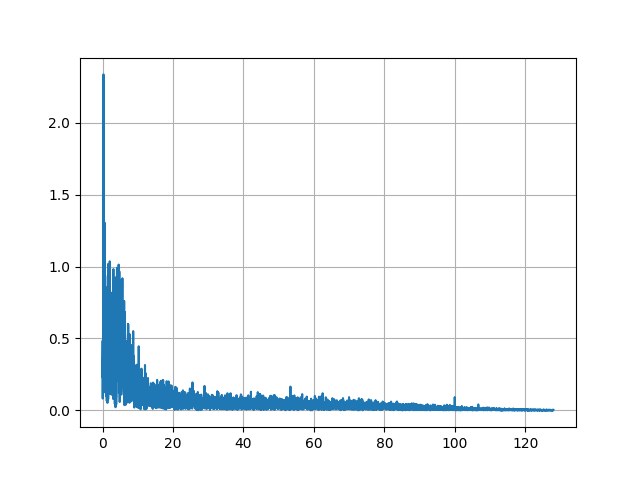

In [499]:
X2 = np.fft.rfft(data_TP9filt)
X2 = X2[0:np.size(frq_axis)]
X2max = (2/n)*abs(X2)
plt.plot(frq_axis, X2max)
plt.grid()

<IPython.core.display.Javascript object>


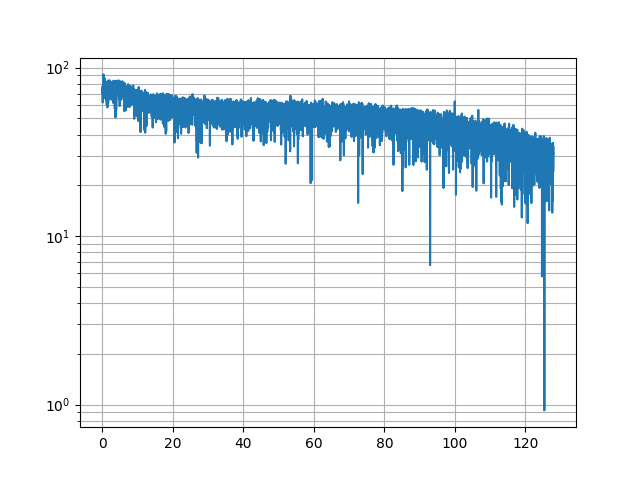

In [517]:
# Compute Power Spectral Density
PSD = 2*abs(X2)
frq_axis[0] = frq_axis[0] + 0.001
plt.plot(frq_axis,20*np.log10(abs(PSD)))
plt.yscale('log')
plt.grid(which='both')

In [543]:
# SPECTRAL FEATURES
# Average of band powers
# Delta <4
ind_delta, = np.where(frq_axis <= 4)
meanDelta = np.mean(PSD[ind_delta], axis=0)
with np.printoptions(precision=3, suppress=True):
    print(np.where(frq_axis<=4))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

<IPython.core.display.Javascript object>


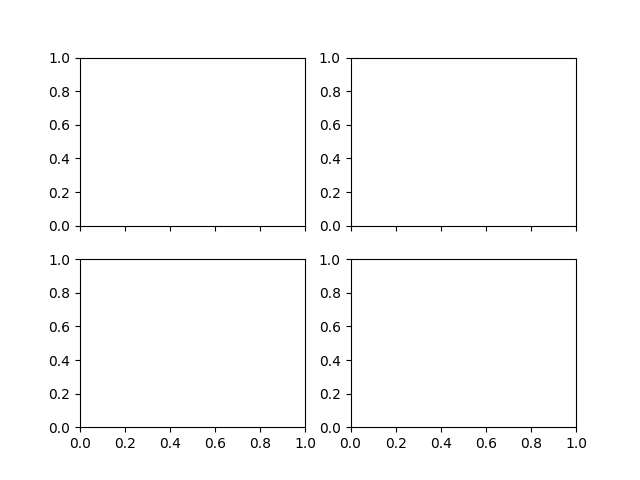

In [530]:


# Theta 4-8
ind_theta, = np.where((frq_axis >= 4) & (frq_axis <= 8))
meanTheta = np.mean(PSD[ind_theta], axis=0)
# Alpha 8-12
ind_alpha, = np.where((frq_axis >= 8) & (frq_axis <= 12))
meanAlpha = np.mean(PSD[ind_alpha], axis=0)
# Beta 12-30
ind_beta, = np.where((frq_axis >= 12) & (frq_axis < 30))
meanBeta = np.mean(PSD[ind_beta], axis=0)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)
#ax1.plot(frq_axis, meanDelta)

#feature_vector = np.concatenate((meanDelta, meanTheta, meanAlpha,
#                                 meanBeta), axis=0)

#feature_vector = np.log10(feature_vector)